Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Criando dados sintéticos

In [2]:
np.random.seed(1) # 
x = np.random.uniform(low=0.0, high=10.0, size=1000)
len(x), x.max(), x.min()

(1000, 9.973228504514806, 0.0011437481734488664)

In [3]:
slope = 0.25
intercept = 1.25
noise = np.random.normal(loc=0.0, scale=1.0, size=1000)

In [4]:
y = slope * x + intercept + noise

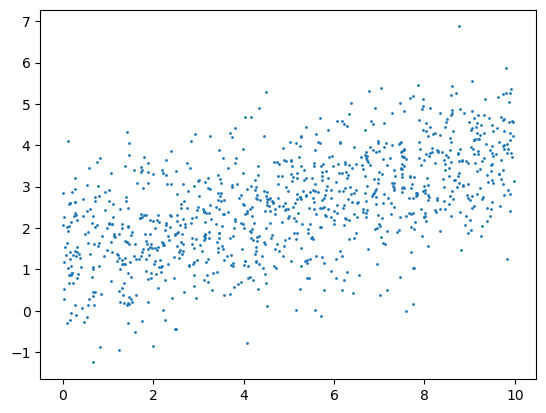

In [5]:
plt.scatter(x, y, s=1);

Regressão Linear com scikit-learn

Instanciando modelo

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Treinamento do modelo

In [7]:
x.shape # não tem explícita a coluna

(1000,)

In [8]:
x.reshape(-1, 1).shape # o reshape(-1, 1) explitica a coluna

(1000, 1)

In [9]:
lr.fit(x.reshape(-1, 1), y)

LinearRegression()

In [10]:
lr.coef_, lr.intercept_

(array([0.25106337]), 1.291997810423688)

In [11]:
a = 0.25106337 # coef_ slope
b = 1.291997810423688 # intercept_ intercept

# f(x) = a*x+b

In [12]:
lr.predict(np.array([0.01]).reshape(-1,1))

array([1.29450844])

In [13]:
y_pred = lr.predict(x.reshape(-1, 1))
y_pred[:10]

array([2.33898732, 3.10046878, 1.29228496, 2.05104416, 1.6604481 ,
       1.5238262 , 1.75962898, 2.15957423, 2.28813561, 2.64476928])

Plotando dados e linha de regressão

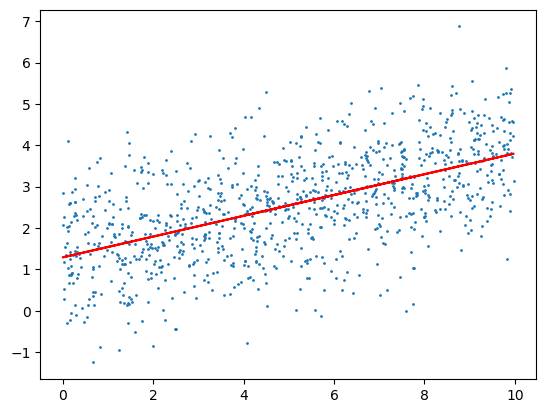

In [14]:
# O ; no final dos gráficos remove aquela "sujeira"
plt.scatter(x, y, s=1); # s=1 é o tamanho da bolas
plt.plot(x, y_pred, 'r'); # r de red que será a cor da linha

Avaliação do modelo

Dividindo dados em treino e teste

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('chapter_1_cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,False,False,False,True
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,False,False,False,True
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,False,False,False,True
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,False,False,False,True
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,False,False,False,True


In [17]:
from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size=0.2, random_state=24)

In [18]:
type(df['EDUCATION']) # é uma série

pandas.core.series.Series

In [19]:
type(df['EDUCATION'].values) # é um array

numpy.ndarray

In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    df['EDUCATION'].values.reshape(-1, 1), # O values transforma a coluna em um array
    df['default payment next month'].values,
    test_size=0.2,
    random_state=24
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

np.mean(y_train), np.mean(y_test)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


(0.223102526838873, 0.21657603600225014)

Criando o modelo

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

Calculando a acurácia

In [22]:
# Acurácia é o percentual de acertos em relação ao todo
acc = np.mean(y_pred == y_test)
# acc = sum(y_pred == y_test) / len(y_pred)

acc

0.7834239639977498

In [23]:
# Na predição tudo foi previsto como 0 enquanto no treinamento temos 1 e 0
np.unique(y_pred), np.unique(y_test, return_counts=True)

(array([0], dtype=int64),
 (array([0, 1], dtype=int64), array([4178, 1155], dtype=int64)))

In [24]:
1- (1155 / (4178+1155))

0.7834239639977498

Matriz de confusão - É a contagem de combinações de resultados organizados em uma matriz

* modelo = 1 -> real = 1
True Positive (TP)

É quando o modelo diz que será devedor e realmente é devedor

* modelo = 0 -> real = 0
True Negative (TN)

É quando o modelo diz que não será devedor e realmente não é devedor

* modelo = 1 -> real = 0
False Positive (FP)

É quando o modelo diz que será devedor e não é devedor

* modelo = 0 -> real = 1
False Negative (FN)

É quando o modelo diz que não será devedor e é devedor


In [25]:
TP = sum((y_pred == 1) & (y_test == 1))
TN = sum((y_pred == 0) & (y_test == 0))
FP = sum((y_pred == 1) & (y_test == 0))
FN = sum((y_pred == 0) & (y_test == 1))

confusion_matrix = np.array([[TN, FP], [FN, TP]])
confusion_matrix

array([[4178,    0],
       [1155,    0]])

In [26]:
acuracia = TP + TN / (TP + TN + FP + FN)
acuracia

0.7834239639977498

In [27]:
sum(confusion_matrix.diagonal()) / confusion_matrix.sum()

0.7834239639977498

Predict_proba (grau de confiança que o modelo vai acertar, ou seja, para a 1ª linha o modelo prevê 0.7746 de chance de ser inadimplente e 0.2253 de não ser inadimplente).

In [64]:
lr.predict_proba(x_test)

array([[0.77460214, 0.22539786],
       [0.77460214, 0.22539786],
       [0.79040961, 0.20959039],
       ...,
       [0.79040961, 0.20959039],
       [0.79040961, 0.20959039],
       [0.79040961, 0.20959039]])

Cálculo da soma de "probabilidades". Toda vez dá 100%

In [66]:
np.sum(lr.predict_proba(x_test), 1)

array([1., 1., 1., ..., 1., 1., 1.])

In [71]:
np.sum(lr.predict_proba(x_test), 1).shape

(5333,)

In [68]:
np.unique(np.sum(lr.predict_proba(x_test), 1)) # Todas as linhas realmente são 1

array([1.])

In [75]:
pos_proba = lr.predict_proba(x_test)[:, 1]
pos_proba

array([0.22539786, 0.22539786, 0.20959039, ..., 0.20959039, 0.20959039,
       0.20959039])

In [79]:
y_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

Plotar probabilidades

Text(0, 0.5, 'Number of samples')

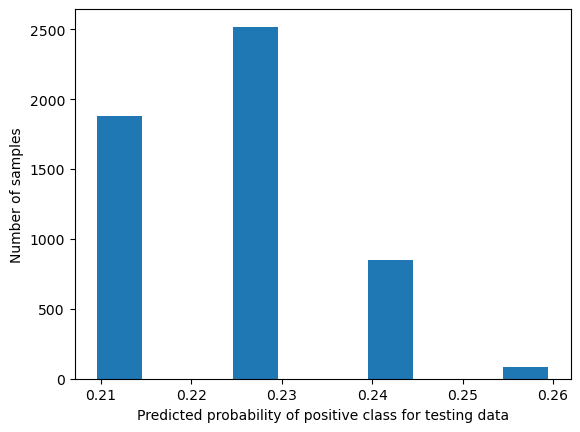

In [77]:
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [80]:
pos_sample_pos_proba = pos_proba[y_test == 1]
neg_sample_pos_proba = pos_proba[y_test == 0]

Plotar histograma empilhado

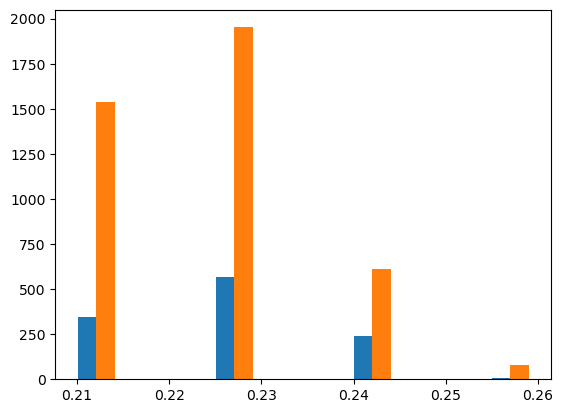

In [82]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba]);

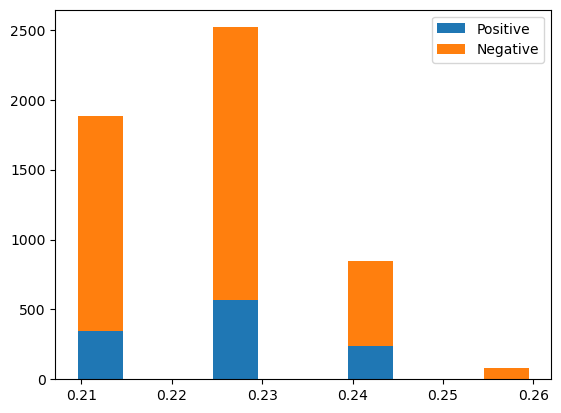

In [85]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked');
plt.legend(['Positive', 'Negative']);

In [87]:
lr.predict_proba(x_test)

array([[0.77460214, 0.22539786],
       [0.77460214, 0.22539786],
       [0.79040961, 0.20959039],
       ...,
       [0.79040961, 0.20959039],
       [0.79040961, 0.20959039],
       [0.79040961, 0.20959039]])

In [88]:
y_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [89]:
pos_proba[y_test==0]

array([0.22539786, 0.22539786, 0.20959039, ..., 0.24203246, 0.20959039,
       0.20959039])

Curva receiver operating characteristic (ROC)

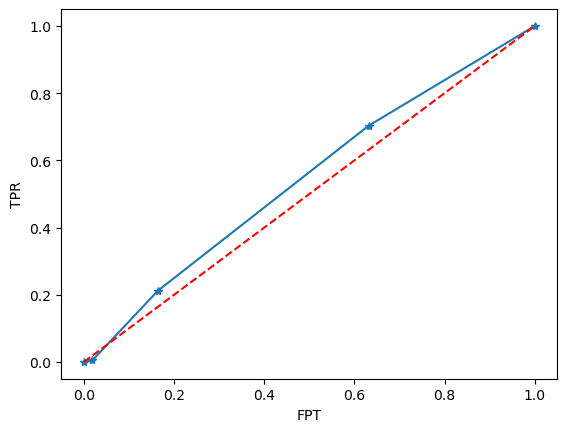

In [98]:
from sklearn import metrics

fpr, tpr, threshold =  metrics.roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr, '*-');
plt.plot([0,1], [0,1], 'r--');
plt.xlabel('FPT');
plt.ylabel('TPR');

In [101]:
print(threshold)
print(fpr)
print(tpr)

[1.25948347 0.25948347 0.24203246 0.22539786 0.20959039]
[0.         0.01842987 0.16419339 0.63140258 1.        ]
[0.         0.004329   0.21212121 0.7030303  1.        ]


In [106]:
pos_preds = lr.predict_proba(x_test)[:, 1]

pos_preds[pos_preds>0.22539786] = 1
pos_preds[pos_preds<=0.22539786] = 0

pos_preds[:10]

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])